# Project Name : Credit Card Fraud Detection

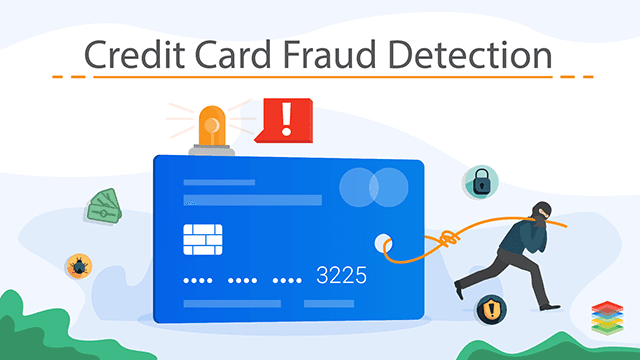

## In this notebook we will perform the following task: 
- Data Analysis
- Feature Engineering
- Model Building and Prediction using ML Techniques

### Importing Libraries

In [3]:
# Project: Credit Card Fraud Detection
# This project aims to detect fraudulent credit card transactions using Machine Learning techniques.

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [4]:
# Define the path to the dataset
data_path = r"C:\Users\BENEL ENERGY\PROJECTS\Credit+Card+Fraud+Using+Pycaret+-Code+and+Files\Code and Files\creditcard.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Initial Data Analysis
print("Dataset Shape: ", df.shape)
print("Missing Values: ", df.isnull().sum())

Dataset Shape:  (284807, 31)
Missing Values:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


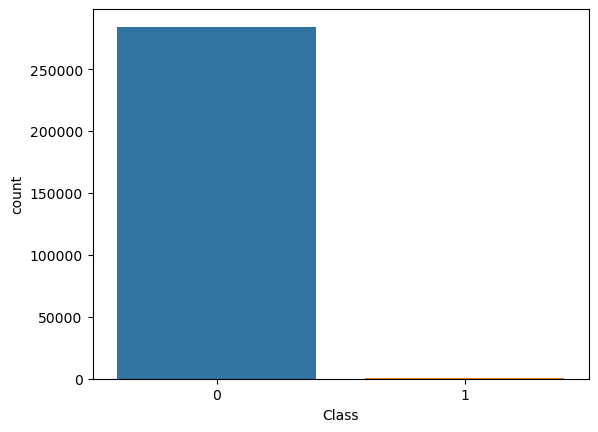

In [5]:
# Visualization of Class Distribution
sns.countplot(x='Class', data=df)
plt.show()

In [7]:
# Splitting the data into normal and fraud cases
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

# Describing the amount in fraud cases
print("Fraud Amount Statistics: ", fraud_people['Amount'].describe())

Fraud Amount Statistics:  count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [8]:
# Describing the amount in normal cases
print("Normal Amount Statistics: ", normal_people['Amount'].describe())

Normal Amount Statistics:  count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


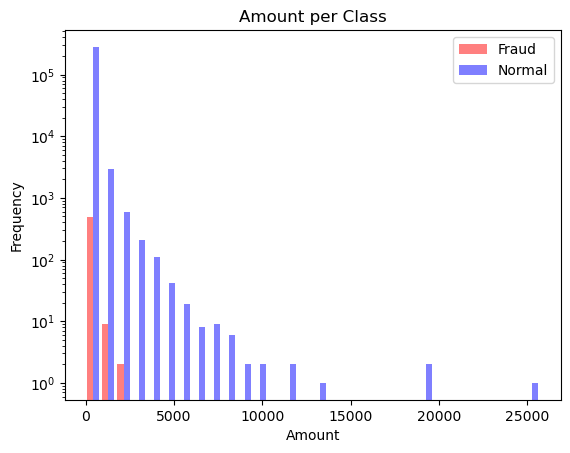

In [9]:
# Visualization of Amount
plt.hist([fraud_people['Amount'], normal_people['Amount']], bins = 30, 
         color=['r', 'b'], alpha=0.5, label=['Fraud', 'Normal'])
plt.legend(loc='upper right')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount per Class')
plt.yscale('log')
plt.show()

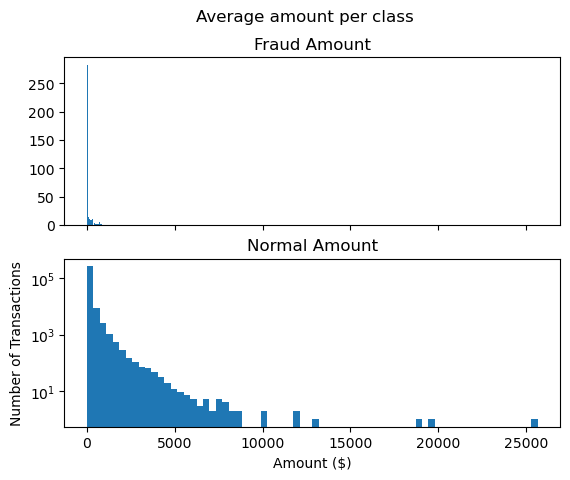

In [13]:
#### Let us analyse it visually

graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [11]:
# Splitting the dataset into features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Building the model (XGBoost)
model = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score:  0.9996313331694814
ROC AUC Score:  0.9030436386710002
